https://www.youtube.com/watch?v=ERDmPJ_0QJc&t

In [12]:
import numpy as np
import cv2 # conda install -c conda-forge opencv (in Anaconda prompt)
import pickle
import matplotlib.pyplot as plt                      
%matplotlib inline

def see_plot(pict):
    #функция отрисовки 2D массива (всего кадра или его кропа/фрагмента)
    plt.figure(figsize=(12,9))
    plt.imshow(pict)
    plt.grid()
    plt.show()
    
def parse_video_to_shots(path_to_video):
    #функция считывания видео и разбиения его на кадры
    p = []
    cap = cv2.VideoCapture(path_to_video)
    i = 0
    while True:
        ret,frame=cap.read()  #frame.shape=718x1280x3
        if not ret or i==28: #сколько кадров считать
            break
        gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        p.append(gray_img)
        i+=1
    return p

In [7]:
%%time

picts = parse_video_to_shots("videoplayback.mp4")
#picts - список с чб кадрами. Кадр - 2D массив np.array c числами от 0 до 255  type=uint8
print(len(picts))

28
CPU times: user 394 ms, sys: 286 µs, total: 395 ms
Wall time: 59.1 ms


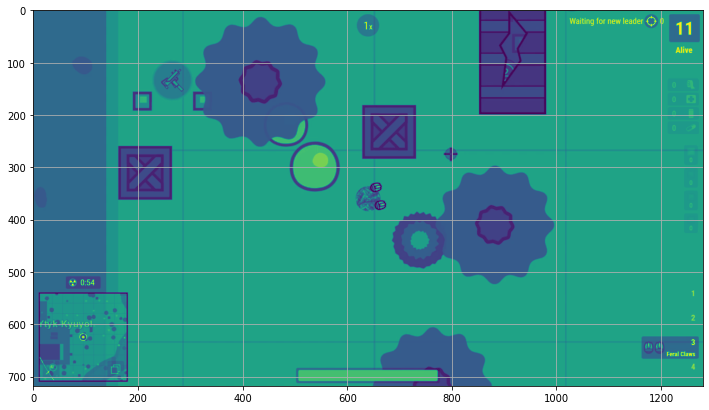

In [8]:
see_plot(picts[1])

## Задача: получить для каждого видео некоторые нужные области:

In [10]:
# координаты
# p = p[x1:x2,y1:y2] ----> (x1,x2,y1,y2)

hp = (697,700,507,777) #p[697:700,507:777]
sp = (673,676,507,777) #p[673:676,507:777]

bandage = (130,158,1215,1243) #p[130:158,1215:1243]
medicine = (157,185,1215,1243) #p[157:185,1215:1243]
cola = (185,213,1215,1243) #p[185:213,1215:1243]
pills = (212,240,1215,1243) #p[212:240,1215:1243]

yellow = (270,298,1245,1273) #p[270:298,1245:1273]
red = (315,343,1245,1273) #p[315:343,1245:1273]
blue = (355,383,1245,1273) #p[355:383,1245:1273]
green = (400,428,1245,1273) #p[400:428,1245:1273]

helmet = (650,678,890,918) #p_bgr[650:678,890:918]
vest = (650,678,930,958) #p_bgr[650:678,930:958]
backpack = (650,678,970,998) #p_bgr[650:678,970:998]

right_bullets = (642,670,685,713) #p[642:670,685:713]
left_bullets = (636,664,610,670) #p[636:664,610:670]
all_kills = (541,569,605,633) #p_bgr[541:569,605:633]
zoom = (15,43,610,740) #p[15:43,610:740]

door = (407,427,670,710) #p[407:427,670:710]
action = (290,310,640,680) #p[290:310,640:680]

aw1 = (525,550,1240,1270)
aw2 = (575,600,1240,1270)
aw3 = (625,650,1240,1270)
aw4 = (675,700,1240,1270)

w1 = (550,575,1200,1270) #[550:575,1200:]
w2 = (600,625,1200,1270) #[600:625,1200:]
w3 = (650,675,1200,1270) #[650:675,1200:]
w4 = (700,717,1200,1270) #[700:,1200:]

In [15]:
d = {'hp':hp,'sp':sp,
     'bandage':bandage,'medicine':medicine,'cola':cola,'pills':pills,
     'yellow':yellow,'red':red,'blue':blue,'green':green,
     'helmet':helmet,'vest':vest,'backpack':backpack,
     'right_bullets':right_bullets,'left_bullets':left_bullets,'all_kills':all_kills,'zoom':zoom,
     'door':door,'action':action,
     'aw1':aw1,'aw2':aw2,'aw3':aw3,'aw4':aw4,
     'w1':w1,'w2':w2,'w3':w3,'w4':w4}


pickle.dump(d, open("NameOfVideo1.pickle", "wb")) #d to_json/to_pickle
new_d = pickle.load(open("NameOfVideo1.pickle", "rb")) #load from saved pickle
new_d

{'hp': (697, 700, 507, 777),
 'sp': (673, 676, 507, 777),
 'bandage': (130, 158, 1215, 1243),
 'medicine': (157, 185, 1215, 1243),
 'cola': (185, 213, 1215, 1243),
 'pills': (212, 240, 1215, 1243),
 'yellow': (270, 298, 1245, 1273),
 'red': (315, 343, 1245, 1273),
 'blue': (355, 383, 1245, 1273),
 'green': (400, 428, 1245, 1273),
 'helmet': (650, 678, 890, 918),
 'vest': (650, 678, 930, 958),
 'backpack': (650, 678, 970, 998),
 'right_bullets': (642, 670, 685, 713),
 'left_bullets': (636, 664, 610, 670),
 'all_kills': (541, 569, 605, 633),
 'zoom': (15, 43, 610, 740),
 'door': (407, 427, 670, 710),
 'action': (290, 310, 640, 680),
 'aw1': (525, 550, 1240, 1270),
 'aw2': (575, 600, 1240, 1270),
 'aw3': (625, 650, 1240, 1270),
 'aw4': (675, 700, 1240, 1270),
 'w1': (550, 575, 1200, 1270),
 'w2': (600, 625, 1200, 1270),
 'w3': (650, 675, 1200, 1270),
 'w4': (700, 717, 1200, 1270)}

## Как проверить себя?

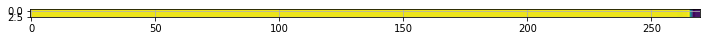

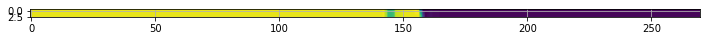

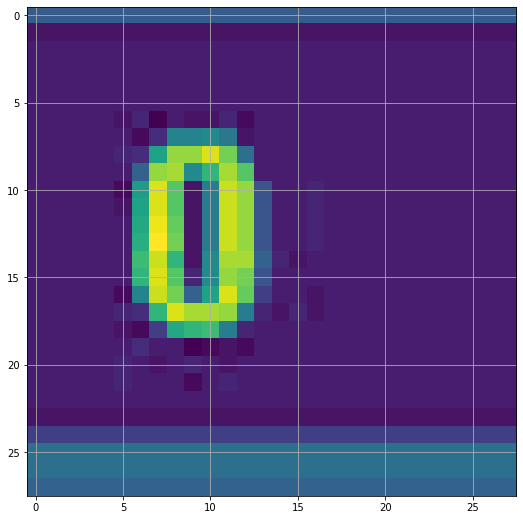

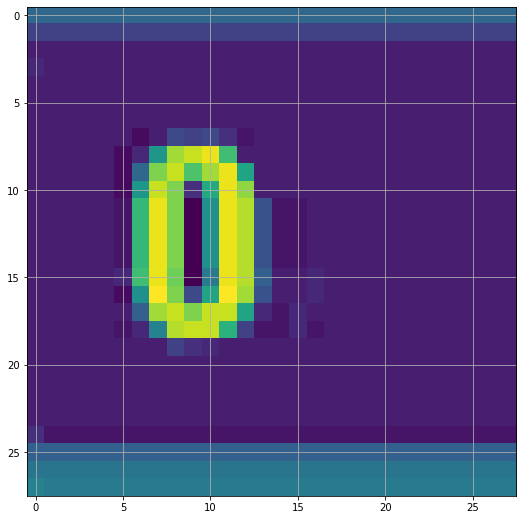

In [20]:
p = picts[0]

see_plot(p[697:700,507:777]) #hp = (697,700,507,777)
see_plot(p[673:676,507:777]) #sp = (673,676,507,777) 

see_plot(p[130:158,1215:1243]) #bandage = (130,158,1215,1243)
see_plot(p[157:185,1215:1243]) #medicine = (157,185,1215,1243) 

cola = (185,213,1215,1243) #p[185:213,1215:1243]
pills = (212,240,1215,1243) #p[212:240,1215:1243]

yellow = (270,298,1245,1273) #p[270:298,1245:1273]
red = (315,343,1245,1273) #p[315:343,1245:1273]
blue = (355,383,1245,1273) #p[355:383,1245:1273]
green = (400,428,1245,1273) #p[400:428,1245:1273]

helmet = (650,678,890,918) #p_bgr[650:678,890:918]
vest = (650,678,930,958) #p_bgr[650:678,930:958]
backpack = (650,678,970,998) #p_bgr[650:678,970:998]

right_bullets = (642,670,685,713) #p[642:670,685:713]
left_bullets = (636,664,610,670) #p[636:664,610:670]
all_kills = (541,569,605,633) #p_bgr[541:569,605:633]
zoom = (15,43,610,740) #p[15:43,610:740]

door = (407,427,670,710) #p[407:427,670:710]
action = (290,310,640,680) #p[290:310,640:680]

aw1 = (525,550,1240,1270)
aw2 = (575,600,1240,1270)
aw3 = (625,650,1240,1270)
aw4 = (675,700,1240,1270)

w1 = (550,575,1200,1270) #[550:575,1200:]
w2 = (600,625,1200,1270) #[600:625,1200:]
w3 = (650,675,1200,1270) #[650:675,1200:]
w4 = (700,717,1200,1270) #[700:,1200:]